<a href="https://colab.research.google.com/github/suzy-hur/IOD_lab_work/blob/main/Lab_5_1_Logistic_Regression_020623.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1
# *Logistic Regression*

## Predicting Survival on the Titanic

The Titanic sank during her maiden voyage after colliding with an iceberg (April 15, 1912). Due to a commercial decision there were insufficient lifeboats, a fact that was partially responsible for the loss 1,502 out of 2,224 passengers and crew.

The Titanic dataset incorporates many features of typical real-world problems: a mixture of continuous and discrete features, missing data, linear covariance, and an element of random chance. Predicting survival therefore involves many practical data science skills.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

### 1. Load Data

Load the `titanic.csv` file into a DataFrame named "titanic", with index column = `PassengerId`. Display the head of the DataFrame.

In [ ]:
# ANSWER
titanic_csv = '../DATA/titanic_train.csv'

In [ ]:
titanic = pd.read_csv('titanic_train.csv', index_col='PassengerId')

Why would we want to set an index column based on `PassengerId`?

ANSWER: This column is the key to training and testing our model. We use it to partition the dataset and to test the predictions of our model against known outcomes.

<a name="datadictionary"></a>
### 2. Data Dictionary

If a data dictionary is available, it is handy to include it in the notebook for reference:

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### 2. EDA

Explore dataset. Find features to predict `Survived`. Get rid of null values.

In [ ]:
# ANSWER
titanic.shape

(891, 11)

In [ ]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Find median age by sex

titanic.groupby("Sex")["Age"].median()

Sex
female    28.0
male      28.0
Name: Age, dtype: float64

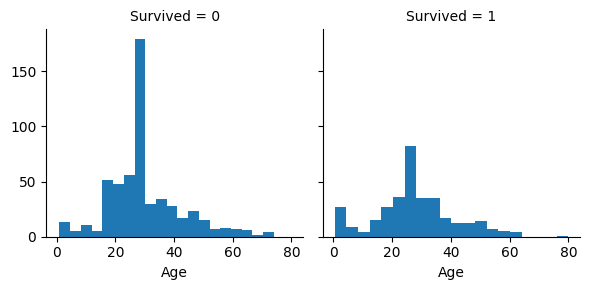

In [ ]:
# Create a FacetGrid plot for age
g = sns.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

<ipython-input-32-bbf346f8dc60>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic['Age'], shade=True)


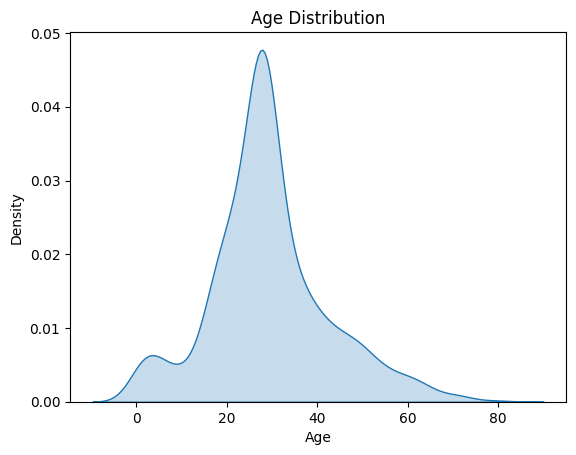

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a KDE plot for age
sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution')
plt.show()


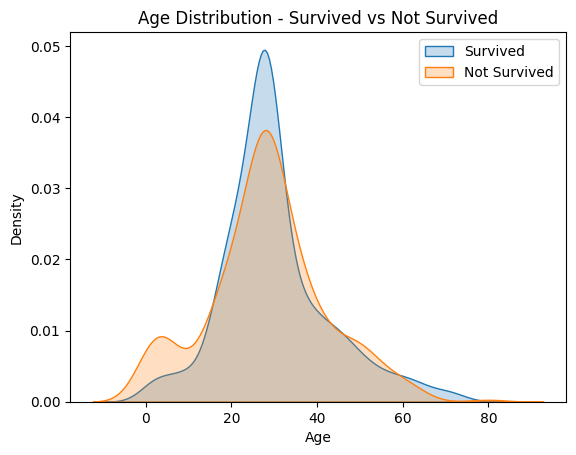

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset for survived and not survived
survived = titanic[titanic['Survived'] == 0]
not_survived = titanic[titanic['Survived'] == 1]

# Plot the KDE curves for survived and not survived
sns.kdeplot(survived['Age'], label='Survived', fill=True)
sns.kdeplot(not_survived['Age'], label='Not Survived', fill=True)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution - Survived vs Not Survived')

# Display the legend
plt.legend()

# Show the plot
plt.show()


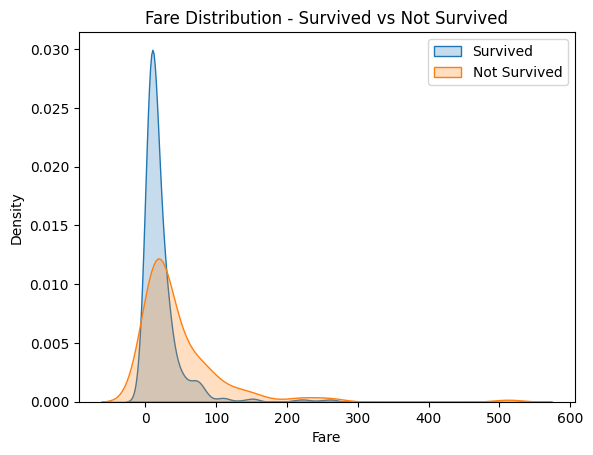

In [ ]:
# Filter the dataset for survived and not survived
survived = titanic[titanic['Survived'] == 0]
not_survived = titanic[titanic['Survived'] == 1]

# Plot the KDE curves for survived and not survived
sns.kdeplot(survived['Fare'], label='Survived', fill=True)
sns.kdeplot(not_survived['Fare'], label='Not Survived', fill=True)

# Set plot labels and title
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Fare Distribution - Survived vs Not Survived')

# Display the legend
plt.legend()

# Show the plot
plt.show()

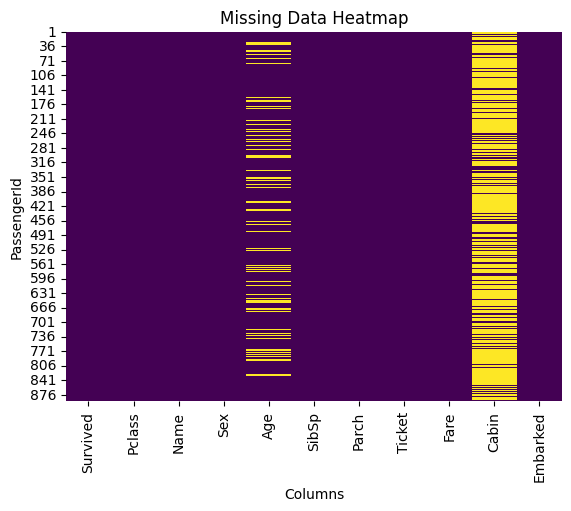

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the Titanic dataset
titanic = pd.read_csv('titanic_train.csv', index_col='PassengerId')

# Missing data heatmap
sns.heatmap(titanic.isnull(), cmap='viridis', cbar=False)
plt.xlabel('Columns')
plt.title('Missing Data Heatmap')
plt.show()

In [ ]:
# Missing data
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# Handle missing values in the "Embarked" column
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Handle missing values in the "Age" column
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# Drop the "Cabin" column
titanic.drop('Cabin', axis=1, inplace=True)

# Verify the updated dataset
print(titanic.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


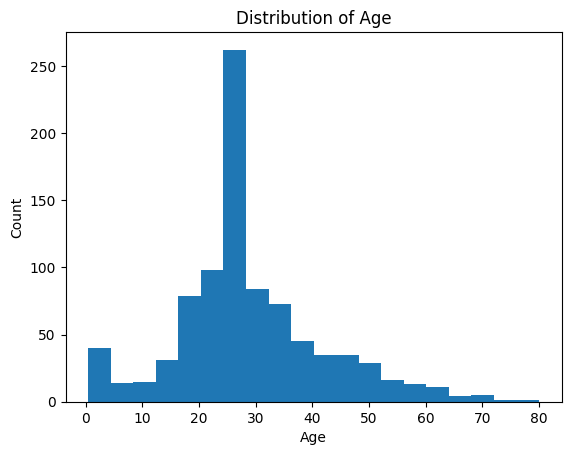

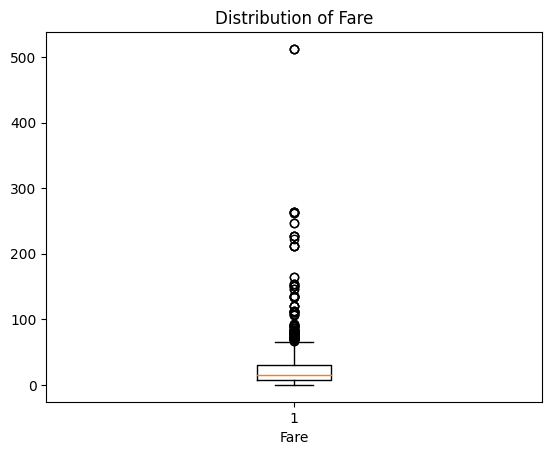

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Age using a histogram
plt.hist(titanic['Age'].dropna(), bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

# Distribution of Fare using a box plot
plt.boxplot(titanic['Fare'])
plt.xlabel('Fare')
plt.title('Distribution of Fare')
plt.show()

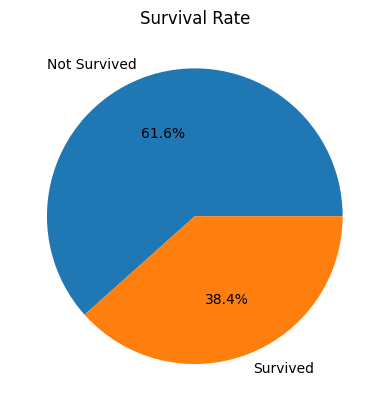

In [ ]:
# Pie chart showing the survival rate
plt.pie(titanic['Survived'].value_counts(), labels=['Not Survived', 'Survived'], autopct='%1.1f%%')
plt.title('Survival Rate')
plt.show()

In [ ]:
print(titanic.dtypes)

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object


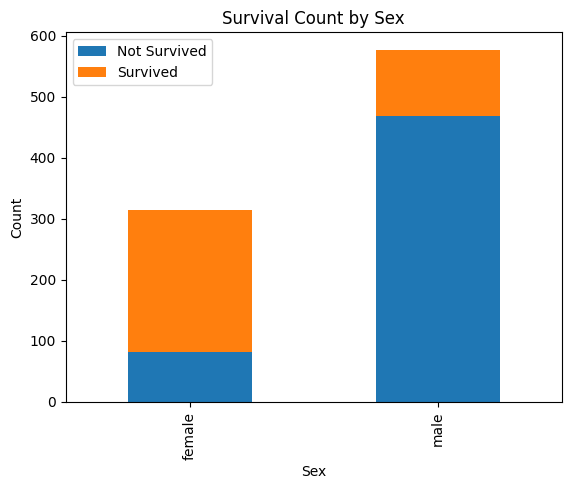

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the cross-tabulation
sex_survived = pd.crosstab(titanic['Sex'], titanic['Survived'])

# Plot the stacked bar chart
sex_survived.plot(kind='bar', stacked=True)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.legend(['Not Survived', 'Survived'])
plt.show()

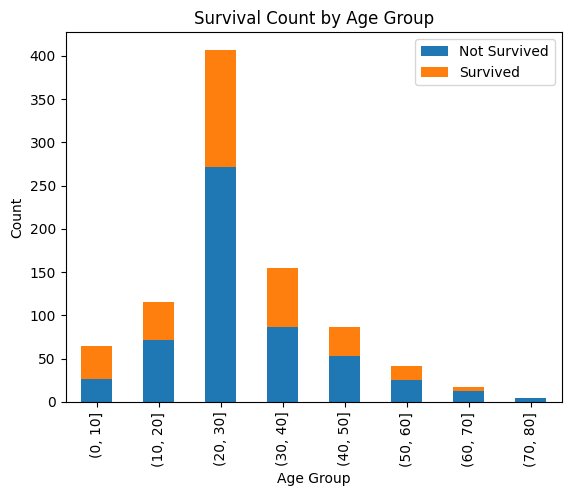

In [ ]:
# Define age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Create age groups based on bins
age_groups = pd.cut(titanic['Age'], bins=age_bins)

# Calculate the cross-tabulation
age_survived = pd.crosstab(age_groups, titanic['Survived'])

# Plot the stacked bar chart
age_survived.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survival Count by Age Group')
plt.legend(['Not Survived', 'Survived'])
plt.show()

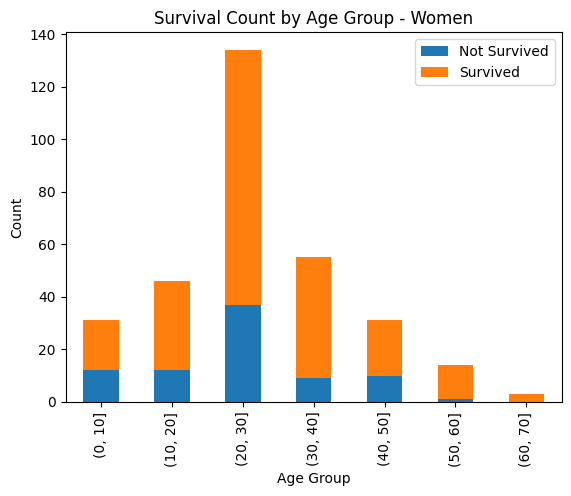

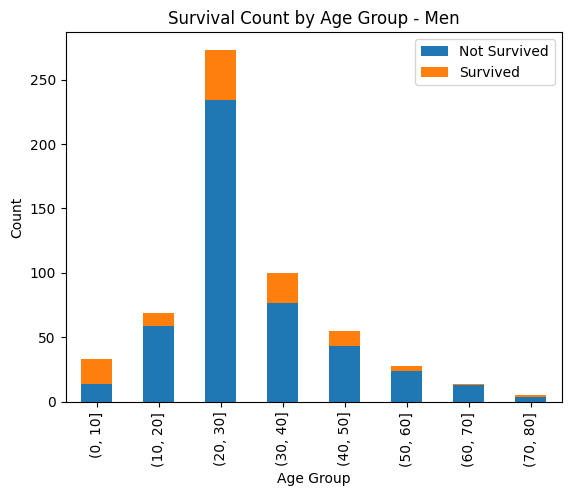

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_groups = pd.cut(titanic['Age'], bins=age_bins)

# Filter the DataFrame by sex
women = titanic[titanic['Sex'] == 'female']
men = titanic[titanic['Sex'] == 'male']

# Calculate the cross-tabulation for each age group
age_groups_women_survived = pd.crosstab(age_groups, women['Survived'])
age_groups_men_survived = pd.crosstab(age_groups, men['Survived'])

# Plot the stacked bar charts for women
age_groups_women_survived.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survival Count by Age Group - Women')
plt.legend(['Not Survived', 'Survived'])
plt.show()

# Plot the stacked bar charts for men
age_groups_men_survived.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survival Count by Age Group - Men')
plt.legend(['Not Survived', 'Survived'])
plt.show()



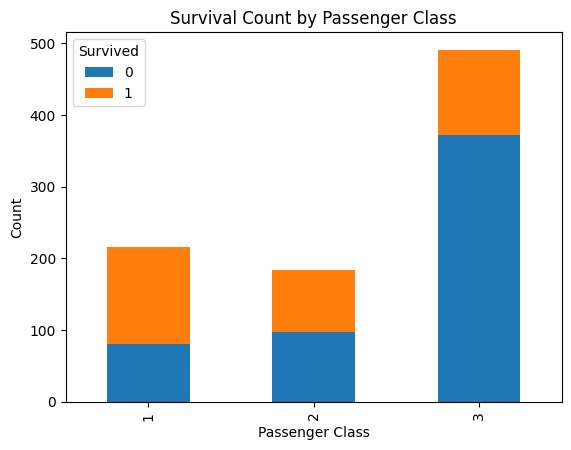

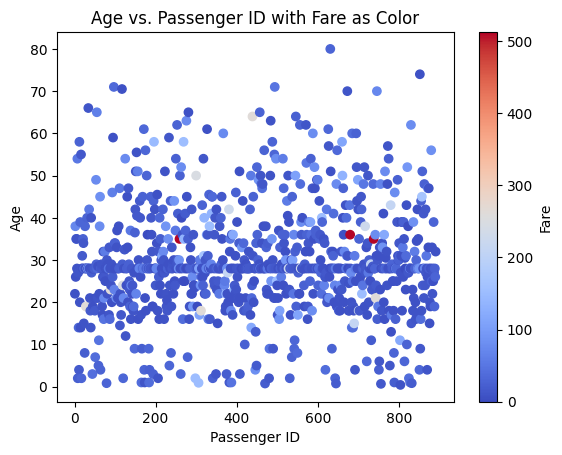

<ipython-input-20-b4dc61549e98>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = titanic.corr()


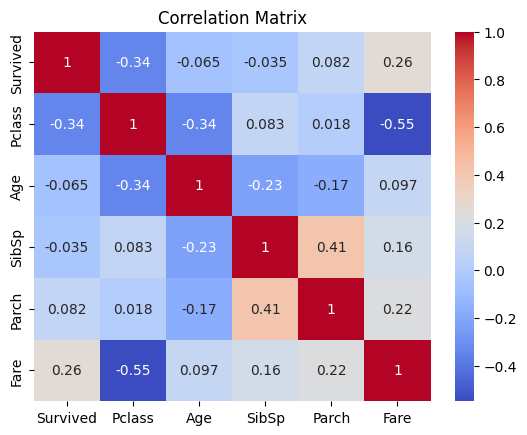

In [ ]:
# Stacked bar plot showing survival count by passenger class
pd.crosstab(titanic['Pclass'], titanic['Survived']).plot(kind='bar', stacked=True)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
plt.show()

# Scatter plot showing the relationship between Age and Fare
plt.scatter(titanic.index, titanic['Age'], c=titanic['Fare'], cmap='coolwarm')
plt.xlabel('Passenger ID')
plt.ylabel('Age')
plt.title('Age vs. Passenger ID with Fare as Color')
plt.colorbar(label='Fare')
plt.show()

# Correlation heatmap to visualize the relationships between variables
corr_matrix = titanic.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### 3. Numerical Predictors Only

#### 3.1. Set Target and Features

To begin, let's try a model based on the passenger class (`Pclass`) and parents/children features (`Parch`):

In [ ]:
# ANSWER

# Set the target variable
target = titanic['Survived']

# Set the features
features = titanic[['Pclass', 'Parch']]


feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic['Survived']

#### 3.2 Partition

Partition the data into training and testing subsets:

- Use `random_state` = 1

In [ ]:
# ANSWER

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

#### 3.3. Build Model

Prepare a model by creating an instance of the `LogisticRegression` class from the `sklearn.linear_model` library:

In [ ]:
# ANSWER
# Create Model

from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression model
logreg = LogisticRegression()

Now train it on the training data subset, using the `fit` method of the model object (Nb. by default, `fit` will print the hyperparameters of the model):

In [ ]:
# ANSWER
# Fit the model to the training data
logreg.fit(X_train, y_train)

LogisticRegression()

The computed coefficients are an array (`coef_`) stored in the 1st element of an array:

In [ ]:
# ANSWER
coefficients = logreg.coef_[0]

The computed intercept (`intercept_`) is the 1st element of another array:

In [ ]:
# ANSWER
intercept = logreg.intercept_[0]

We can create tuples of the predictor names and coefficients like this:

In [ ]:
# ANSWER
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Print the coefficients
print(set(zip(feature_cols, logreg.coef_[0])))

{('Pclass', -0.9082421341469834), ('Parch', 0.33432155514777895)}


If we want formatted output, here is a neat way to list the coefficients by predictor:

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create an instance of LogisticRegression
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Print the coefficients
for col in zip(X_train.columns, logreg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1]))  # Nb. increase 10 for longer names


Pclass      -0.908242
Parch       +0.334322


This result implies that survival declines with passenger class (i.e. 1st class is highest) but increases with the number of parents or children in a group.

# Interpretation

Based on the coefficients provided, the interpretation would be as follows:

* For the "Pclass" feature, the coefficient of -0.908242 suggests that as the passenger class (Pclass) increases (going from lower class to higher class), the log-odds of survival decrease. This means that higher-class passengers are more likely to survive compared to lower-class passengers.

* For the "Parch" feature, the coefficient of +0.334322 suggests that as the number of parents or children (Parch) increases, the log-odds of survival increase. This means that passengers who have more parents or children onboard are more likely to survive.

So, the interpretation matches the statement provided in the notebook answer: survival declines with passenger class but increases with the number of parents or children in a group.

Let's see how well the model fit the training data. The `accuracy_score` is the proportion of correct predictions:

In [ ]:
# ANSWER
from sklearn.metrics import accuracy_score

# Train your logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the labels for the training data
y_train_pred = model.predict(X_train)

# Calculate the accuracy score
accuracy = accuracy_score(y_train, y_train_pred)

print("Accuracy:", accuracy)


Accuracy: 0.6924157303370787


What is the  `accuracy_score` for the test data?

In [ ]:
# ANSWER

The accuracy score represents the proportion of correctly predicted labels in the test data compared to the actual labels. In this case, the accuracy score of 0.6924 means that the model correctly predicted the survival outcome for approximately 69.24% of the passengers in the test data.

What can we say about this result?

ANSWER
* The accuracy score of 0.6924 indicates that the model's predictions were somewhat accurate, correctly classifying around 69.24% of the passengers in the test data
* However, the accuracy score alone does not provide a complete picture of the model's performance. It is essential to consider other evaluation metrics and examine the context of the problem
* The accuracy score suggests that the model's predictions were better than random guessing but may not be highly reliable or precise
* There could be various factors contributing to the model's performance, such as the chosen features, model complexity, or the underlying patterns in the data
* To obtain a more comprehensive understanding of the model's effectiveness, further evaluation and analysis are necessary, including assessing other metrics like precision, recall, and conducting cross-validation

#### 3.4. Add `AGE` as Feature

Let's include `Age` in the model. As we know from our EDA, this feature has many missing values. We don't want to throw away so many rows, so we will replace `NA` values with imputed values (e.g. the overall mean age):

In [ ]:
# ANSWER
titanic['Age'].fillna(titanic.Age.mean(), inplace=True)
feature_cols = ['Pclass', 'Parch', 'Age']
X = titanic[feature_cols]

In [ ]:
# Build Model
logreg = LogisticRegression()

# Fit Model
logreg.fit(X_train, y_train)

# Score
logreg_score = logreg.score(X_train, y_train)
print('accuracy = {:1.4f}'.format(logreg_score))

accuracy = 0.6924


In [ ]:
# Build Model

# Fit Model

# Score

So, including age did little to reduce the variance in our model. Why might this be?

ANSWER

The accuracy score of the logistic regression model is 0.6924, indicating that it correctly predicts the survival outcome for about 69.24% of the training data

Including the 'Age' feature in the model did not significantly reduce its variability. Possible reasons for this could be:

* Weak correlation: Age may not have a strong relationship with the target variable ('Survived'), meaning that it does not provide substantial predictive power on its own
* Imputation method: Imputing missing values in the 'Age' column using the mean might introduce bias and fail to capture the true variability in age
* Limited influence: Other features like 'Pclass' or 'Parch' might have a more significant impact on survival predictions compared to age, making its inclusion less influential

To further investigate the impact of 'Age' and explore other factors affecting the model's performance, additional analysis, feature engineering, or trying different machine learning algorithms can be considered

Let's see where the model is going wrong by showing the Confusion Matrix:

In [ ]:
# ANSWER
from sklearn.metrics import confusion_matrix

y_pred_class = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred_class))

[[87 19]
 [43 30]]


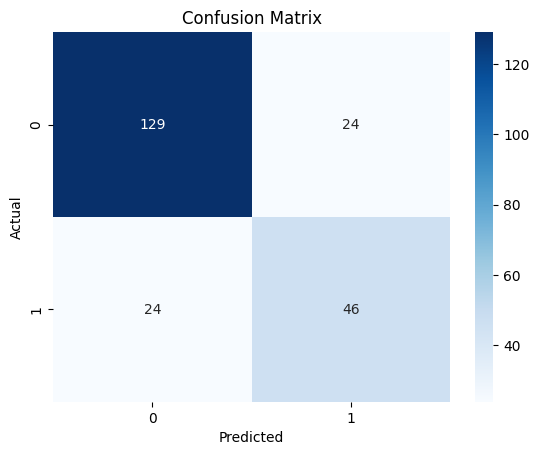

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_class = logreg.predict(X_test)
confusion = confusion_matrix(y_test, y_pred_class)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Nb. Here is how `confusion_matrix` arranges its output:

In [ ]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


Which type of error is more prevalent?

ANSWER:
Based on the confusion matrix, we can determine the prevalence of different types of errors:
* True Negative (TN): 87
* False Positive (FP): 19
* False Negative (FN): 43
*
True Positive (TP): 30
To determine which type of error is more prevalent, we compare the values. In this case, the False Negative (FN) value of 43 is higher than the False Positive (FP) value of 19. Therefore, we can conclude that the model has a higher prevalence of False Negative errors.

Maybe we aren't using the right cut-off value. By default, we are predicting that `Survival` = True if the probability >= 0.5, but we could use a different threshold. The ROC curve helps us decide (as well as showing us how good our predictive model really is):

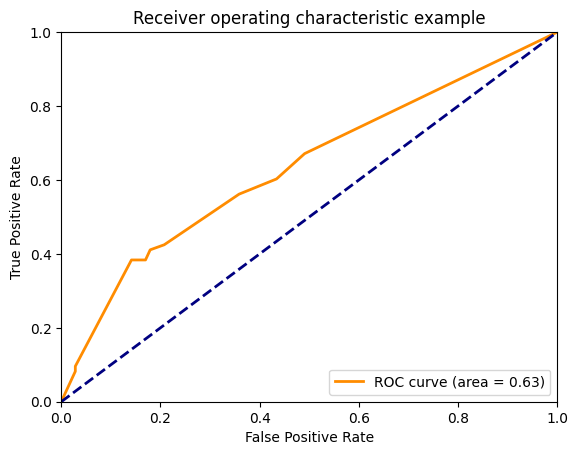

In [ ]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

from sklearn import metrics


# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

### 4. Including Categorical Predictors

So far, we've only used numerical features for prediction. Let's convert the character features to dummy variables so we can include them in the model:

In [ ]:
titanic_with_dummies = pd.get_dummies(data = titanic, columns = ['Sex', 'Embarked', 'Pclass'],
                                      prefix = ['Sex', 'Embarked', 'Pclass'] )
titanic_with_dummies.head()

,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,
1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,1,0,0
3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1,1,0,0
5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,1


So, this created a column for every possible value of every categorical variable. (A more compact approach would have been to reduce the number of dummy variables by one for each feature, so that the first variable from each captures two possible states.)

Now that we have data on sex, embarkation port, and passenger class we can try to improve our `Age` imputation by stratifying it by the means of groups within the passenger population:

In [ ]:
titanic_with_dummies['Age'] = titanic_with_dummies[["Age", "Parch", "Sex_male", "Pclass_1", "Pclass_2"]].groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

Now train the model using the expanded set of predictors and compute the accuracy score for the test set:

In [ ]:
# ANSWER
# Set Feature Both Numerical, Categorical

# Create dummy variables for categorical columns
titanic_with_dummies = pd.get_dummies(data=titanic, columns=['Sex', 'Embarked', 'Pclass'], prefix=['Sex', 'Embarked', 'Pclass'])

# Drop unnecessary columns
titanic_with_dummies = titanic_with_dummies.drop(['Name', 'Ticket'], axis=1)

# Impute missing values in the 'Age' column with the mean age
titanic_with_dummies['Age'] = titanic_with_dummies.groupby(["Parch", "Sex_male", "Pclass_1", "Pclass_2"])["Age"].transform(lambda x: x.fillna(x.mean()))

# Split the data into features (X) and target (y)
X = titanic_with_dummies.drop('Survived', axis=1)
y = titanic_with_dummies['Survived']

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Build and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Calculate the accuracy score for the test set
accuracy = logreg.score(X_test, y_test)
print('Accuracy score:', accuracy)


Accuracy score: 0.7932960893854749


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Plot the ROC curve for the new model:

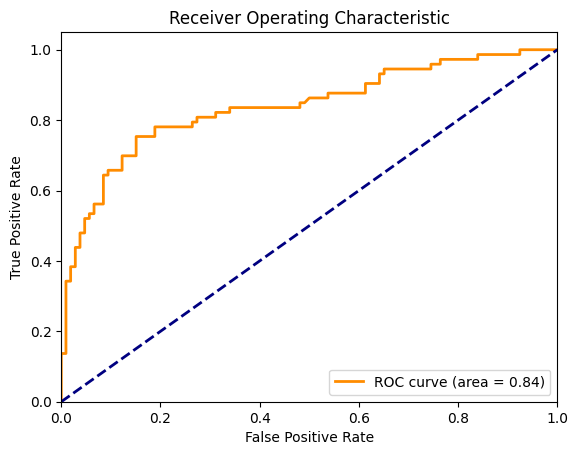

In [ ]:
# ANSWER
from sklearn.metrics import roc_curve, auc
# Generate the prediction probabilities for each of the test observations
preds = logreg.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, preds)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Can we improve the model by including the remaining features?

In [ ]:
# ANSWER

# Convert numerical features to categorical
titanic_with_dummies['Age'] = titanic_with_dummies['Age'].astype('category')
titanic_with_dummies['Fare'] = titanic_with_dummies['Fare'].astype('category')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define the target column and feature columns
target_col = 'Survived'
feature_cols = ['Age', 'SibSp', 'Parch', 'Fare',
                'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
                'Pclass_1', 'Pclass_2', 'Pclass_3']

# Get the dataset with dummy variables
titanic_with_dummies = pd.get_dummies(data=titanic, columns=['Sex', 'Embarked', 'Pclass'],
                                      prefix=['Sex', 'Embarked', 'Pclass'])

# Calculate the survival percentages
ttwd = titanic_with_dummies
print("Male survival: {:5.2f}% of {}\nFemale survival: {:5.2f}% of {}\nChild survival: {:5.2f}% of {}".format(
    100 * ttwd[ttwd.Sex_male == 1].Survived.mean(), ttwd.Sex_male.sum(),
    100 * ttwd[ttwd.Sex_female == 1].Survived.mean(), ttwd.Sex_female.sum(),
    100 * ttwd[ttwd.Age < 16].Survived.mean(), len(ttwd[ttwd.Age < 16])))

# Split the data into training and testing sets
X = titanic_with_dummies[feature_cols]
y = titanic_with_dummies[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Build the logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions and create a results DataFrame
y_hat = logreg.predict(X)
y_hats = pd.Series(y_hat, index=X.index)
y_hatdf = pd.DataFrame({'y_hat': y_hats})
y_actuals = pd.Series(y, index=X.index)
y_actualdf = pd.DataFrame({'y_actual': y_actuals})
ttall = y_hatdf.join(y_actualdf).join(X)
ttall.head()

Male survival: 18.89% of 577
Female survival: 74.20% of 314
Child survival: 59.04% of 83


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,y_hat,y_actual,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,
1,0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
3,1,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
5,0,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [ ]:
print("Male survival: {:5.2f}% of {}\nFemale survival: {:5.2f}% of {}\nChild survival: {:5.2f}% of {}".format(
    100 * ttall[ttall.Sex_male == 1].y_hat.mean(), ttall.Sex_male.sum(),
    100 * ttall[ttall.Sex_female == 1].y_hat.mean(), ttall.Sex_female.sum(),
    100 * ttall[ttall.Age < 16].y_hat.mean(), len(ttall[ttall.Age < 16])))


Male survival:  5.55% of 577
Female survival: 86.62% of 314
Child survival: 50.60% of 83


## Homework

1. Remove the `random_state` parameter (if you have used), so that the data partition will be different every time, and run through the final modelling process a few times. Do the results change?

2. Use cross-validation to assess the quality of the model when overfitting is controlled. Does the accuracy improve?

3. Look at the `fpr` & `tpr` vectors for the best model.

In [ ]:
# Build Model
logreg = LogisticRegression()

# Fit
logreg.fit(X_train, y_train)

# Predict
y_pred_class = logreg.predict(X_test)

# Save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)

# [row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# True Positive (TP): Predicted positive and actually positive
# True Negative (TN): Predicted negative and actually negative
# False Positive (FP): Predicted positive but actually negative (Type I error)
# False Negative (FN): Predicted negative but actually positive (Type II error)

# The confusion matrix provides a tabular representation of the model's predictions
# TP, TN, FP, and FN values are extracted from the confusion matrix to compute performance metrics

[[129  24]
 [ 24  46]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import cross_val_score
target_col = 'Survived'
feature_cols = ['Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3']
logreg = LogisticRegression()
scores = cross_val_score(logreg, titanic_with_dummies[feature_cols], titanic_with_dummies[target_col], cv=5)
scores.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.7912560416797438

In [ ]:
# Build Model
logreg = LogisticRegression()

# Fit
logreg.fit(X_train, y_train)

# Predict
y_pred_class = logreg.predict(X_test)

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)

#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[129  24]
 [ 24  46]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

# Calculate the accuracy score
# Accuracy score = (TP + TN) / (TP + TN + FP + FN)
# where TP is the number of true positives, TN is the number of true negatives,
# FP is the number of false positives, and FN is the number of false negatives
# The accuracy score measures the proportion of correctly classified samples
# Using float division ensures accurate calculation of the score

# Alternatively, we can directly use the metrics.accuracy_score function
# The accuracy score function calculates (TP + TN) / (TP + TN + FP + FN)
# Both approaches give the same accuracy score, which indicates the model's overall accuracy
# A higher accuracy score implies a higher proportion of correctly classified samples

0.7847533632286996
0.7847533632286996


In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

# Calculate the classification error or misclassification rate
# Classification error = (FP + FN) / (TP + TN + FP + FN)
# where FP is the number of false positives, FN is the number of false negatives,
# TP is the number of true positives, and TN is the number of true negatives
# The classification error measures the overall error rate of the model's predictions

# Alternatively, we can calculate the classification error by subtracting the accuracy score from 1
# The accuracy score is defined as (TP + TN) / (TP + TN + FP + FN)
# So, 1 - accuracy_score gives the same value as the classification error
# These metrics provide insights into the model's classification accuracy and misclassification rate
# A lower classification error and a higher accuracy score indicate better model performance

0.21524663677130046
0.2152466367713004


In [ ]:
# Sensitivity (True Positive Rate, Recall)
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

# Specificity
specificity = TN / (TN + FP)
print(specificity)

# False Positive Rate
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

# Precision
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(y_test, y_pred_class))


0.6571428571428571
0.6571428571428571
0.8431372549019608
0.1568627450980392
0.1568627450980392
0.6571428571428571
0.6571428571428571


* Sensitivity (True Positive Rate): 0.657 (or 65.7%)
** This indicates that the model correctly predicted 65.7% of the actual positive cases
** This measure shows how well the model performs in identifying the positive instances
** A higher sensitivity implies a better ability to detect positive cases.

* Specificity: 0.843 (or 84.3%)
** This suggests that the model correctly identified 84.3% of the actual negative cases
** This measure reflects the model's ability to correctly classify negative instances
** A higher specificity indicates a better ability to distinguish negative cases

* False Positive Rate: 0.157 (or 15.7%)
** This signifies that 15.7% of the actual negative cases were incorrectly classified as positive by the model
** This measure represents the proportion of false alarms or falsely predicted positive cases
** A lower false positive rate indicates a better ability to avoid false alarms

* Precision: 0.657 (or 65.7%)
** This indicates that 65.7% of the positive predictions made by the model were correct
** This measure reflects the accuracy of the positive predictions
** A higher precision implies a lower proportion of false positive predictions



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



